# HIDSAG - Hyperspectral Image Database for Supervised Analysis in Geometallurgy

This is an example to demonstrate the use of HIDSAG data sets. The current notebook will include:

1. Import a Dataset with hyperspectral data.
2. Reconstruction of provided spreadsheets
3. Filtering by metadata
4. Exploring a single sample
    * Select a specific band and position for data extraction (slicing)
    * Visualize the resulting slices

## Notebook requirements
The following code allows to import the required libraries. This notebook requires Python 3.

In [1]:
import os
import sys
sys.path.append('..')

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
from matplotlib.pyplot import figure

import seaborn as sns
cmap = plt.cm.jet
import hidsag

You will need the data record to run the scripts in this notebook. The data records are free and can be downloaded from **figshare** at: 

- GEOMET https://figshare.com
- GEOCHEM https://figshare.com
- MINERAL1 https://figshare.com
- MINERAL2 https://figshare.com
- PORPHYRY https://figshare.com

## Import Data Record: GEOCHEM
HIDSAG allow us to use different data records. From this point we will assume the data records are stored at `./data` directory side-by-side to this notebook. You can replace anytime the data record `GEOCHEM` from this example to any other data record listed above.

In [2]:
dataset_path = './data'

In [3]:
hidsag.set_dataset("GEOCHEM")

'GEOCHEM'

Double check to see if the configuration is ready to use

In [4]:
hidsag.get_dataset()

'GEOCHEM'

List the samples inside the dataset path choosed.

In [5]:
hidsag.list_samples(dataset_path)

['GCH-0001',
 'GCH-0002',
 'GCH-0003',
 'GCH-0004',
 'GCH-0005',
 'GCH-0006',
 'GCH-0007',
 'GCH-0008',
 'GCH-0009',
 'GCH-0010',
 'GCH-0011',
 'GCH-0012',
 'GCH-0013',
 'GCH-0014',
 'GCH-0015',
 'GCH-0016',
 'GCH-0017',
 'GCH-0018',
 'GCH-0019',
 'GCH-0020',
 'GCH-0021',
 'GCH-0022',
 'GCH-0023',
 'GCH-0024',
 'GCH-0025',
 'GCH-0026',
 'GCH-0027',
 'GCH-0028']

## Recosntruction of spreadsheets
Using the following code will get all the samples information of the already selected data record `GEOCHEM`. This information is obtained directly from the metadata files inside each subfolder.

In [6]:
samples_list = hidsag.get_samples_list(dataset_path)

Using the resulting list of dictionaries (`samples_list`), it can be created a pandas DataFrame to have the data as tabular data to build a spreadsheet.

In [7]:
df_geochem = pd.DataFrame(samples_list)

You can operate as a pandas DataFrame, were for example can visualize the first 5 rows

In [8]:
df_geochem.head(5)

,sample_id,Al,Si,P,S,K,Ca,Ti,Fe,Cu,...,Nb,Mo,Pb,CROP,tags,kind,image_dims@width,image_dims@height,real_dims@width,real_dims@height
0,GCH-0001,4.29,17.96,0.5527,1.6674,2.7361,1.4206,0.4667,4.31,1.3321,...,0.0,0.0577,0.0044,1,coarse,swir_low,169,65,104.7,53.0
1,GCH-0001,4.29,17.96,0.5527,1.6674,2.7361,1.4206,0.4667,4.31,1.3321,...,0.0,0.0577,0.0044,1,coarse,vnir_low,169,65,104.7,53.0
2,GCH-0001,4.29,17.96,0.5527,1.6674,2.7361,1.4206,0.4667,4.31,1.3321,...,0.0,0.0577,0.0044,1,coarse,vnir_high,378,68,104.6,55.4
3,GCH-0001,4.29,17.96,0.5527,1.6674,2.7361,1.4206,0.4667,4.31,1.3321,...,0.0,0.0577,0.0044,2,coarse,swir_low,163,69,101.0,56.2
4,GCH-0001,4.29,17.96,0.5527,1.6674,2.7361,1.4206,0.4667,4.31,1.3321,...,0.0,0.0577,0.0044,2,coarse,vnir_low,163,69,101.0,56.2


Finally, it will be saved on as a spreadsheet using `GEOCHEM.xlsx` filename.

In [9]:
df_geochem.to_excel('GEOCHEM.xlsx', index=False)

## Filtering by metadata
Assuming that you have done the previous steps, and you have generated all the spreadsheets, you can load the resulting a single file as a pandas DataFrame also. We will use the `MINERAL1` datarecord for filtering metadata. The filter on this case, will use the `contains` method from [pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).

In [10]:
df_m1 = pd.read_excel('MINERAL1.xlsx')

lets visualize the last 5 rows

In [11]:
df_m1.tail(5)

,sample_id,Chalcopyrite,Bornite,Chalcosite/Digenite,Covelite,Pyrite,Molybdenite,Fe Oxides,Rutile,Quartz,...,Apatite,Others Ti Minerals,Others,CROP,tags,kind,image_dims@width,image_dims@height,real_dims@width,real_dims@height
292,M1-0098,2.15,0.41,0.05,0.02,2.10,0.07,0.81,0.68,23.80,...,0.29,0.58,0.29,1,"P2,S9,mixed",vnir_low,118,113,73.1,92.1
293,M1-0098,2.15,0.41,0.05,0.02,2.10,0.07,0.81,0.68,23.80,...,0.29,0.58,0.29,1,"P2,S9,mixed",vnir_high,263,114,72.8,92.9
294,M1-0099,2.20,0.26,0.05,0.01,2.26,0.03,0.75,0.61,24.78,...,0.41,0.52,0.19,1,"P3,S9,mixed",swir_low,123,116,76.2,94.5
295,M1-0099,2.20,0.26,0.05,0.01,2.26,0.03,0.75,0.61,24.78,...,0.41,0.52,0.19,1,"P3,S9,mixed",vnir_low,123,116,76.2,94.5
296,M1-0099,2.20,0.26,0.05,0.01,2.26,0.03,0.75,0.61,24.78,...,0.41,0.52,0.19,1,"P3,S9,mixed",vnir_high,275,117,76.1,95.4


The amount of rows on this data record is 297

In [12]:
len(df_m1)

297

The first filter will select samples belonging to _Process P2_ **AND** particle size _'coarse'_

In [13]:
filtered1_m1 = df_m1[df_m1.tags.str.contains(r'^(?=.*P2)(?=.*coarse)')]

In [14]:
filtered1_m1.head()

,sample_id,Chalcopyrite,Bornite,Chalcosite/Digenite,Covelite,Pyrite,Molybdenite,Fe Oxides,Rutile,Quartz,...,Apatite,Others Ti Minerals,Others,CROP,tags,kind,image_dims@width,image_dims@height,real_dims@width,real_dims@height
3,M1-0002,0.53,0.05,0.0,0.0,0.97,0.03,0.42,0.65,20.60,...,0.30,0.77,0.16,1,"P2,S1,coarse",swir_low,117,82,72.5,66.8
4,M1-0002,0.53,0.05,0.0,0.0,0.97,0.03,0.42,0.65,20.60,...,0.30,0.77,0.16,1,"P2,S1,coarse",vnir_low,117,82,72.5,66.8
5,M1-0002,0.53,0.05,0.0,0.0,0.97,0.03,0.42,0.65,20.60,...,0.30,0.77,0.16,1,"P2,S1,coarse",vnir_high,262,84,72.5,68.5
12,M1-0005,0.54,0.13,0.1,0.0,2.02,0.02,1.64,0.87,22.73,...,0.23,0.80,0.25,1,"P2,S2,coarse",swir_low,143,75,88.6,61.1
13,M1-0005,0.54,0.13,0.1,0.0,2.02,0.02,1.64,0.87,22.73,...,0.23,0.80,0.25,1,"P2,S2,coarse",vnir_low,143,75,88.6,61.1


The resulting amount of samples on this filter are 36

In [15]:
len(filtered1_m1)

36

A second filter will require samples from monthly composites _S1_, _S2_ **OR** _S4_. 

In [16]:
filtered2_m1 = df_m1[df_m1.tags.str.contains('S1|S2|S4')]

In [17]:
filtered2_m1.head()

,sample_id,Chalcopyrite,Bornite,Chalcosite/Digenite,Covelite,Pyrite,Molybdenite,Fe Oxides,Rutile,Quartz,...,Apatite,Others Ti Minerals,Others,CROP,tags,kind,image_dims@width,image_dims@height,real_dims@width,real_dims@height
0,M1-0001,0.50,0.01,0.03,0.0,0.86,0.00,0.61,0.63,30.49,...,0.21,0.84,0.20,1,"P1,S1,coarse",swir_low,44,28,27.3,22.8
1,M1-0001,0.50,0.01,0.03,0.0,0.86,0.00,0.61,0.63,30.49,...,0.21,0.84,0.20,1,"P1,S1,coarse",vnir_low,44,28,27.3,22.8
2,M1-0001,0.50,0.01,0.03,0.0,0.86,0.00,0.61,0.63,30.49,...,0.21,0.84,0.20,1,"P1,S1,coarse",vnir_high,99,29,27.4,23.6
3,M1-0002,0.53,0.05,0.00,0.0,0.97,0.03,0.42,0.65,20.60,...,0.30,0.77,0.16,1,"P2,S1,coarse",swir_low,117,82,72.5,66.8
4,M1-0002,0.53,0.05,0.00,0.0,0.97,0.03,0.42,0.65,20.60,...,0.30,0.77,0.16,1,"P2,S1,coarse",vnir_low,117,82,72.5,66.8


The resulting amount of samples on the second filter are 135

In [18]:
len(filtered2_m1)

135

## Exploring a single sample
We are using the datarecord GEOCHEM. On the following example we will get the information of one single sample to obtain the information of one pixel and the image.

In [19]:
sample0011 = hidsag.get_sample('GCH-0011')

In [20]:
variables = sample0011.get_variables()
variables

{'Al': 4.54,
 'Si': 19.08,
 'P': 0.5776,
 'S': 1.5573,
 'K': 2.976,
 'Ca': 0.9401,
 'Ti': 0.375,
 'Fe': 3.94,
 'Cu': 1.467,
 'Zn': 0.0303,
 'As': 0.0184,
 'Rb': 0.0127,
 'Sr': 0.0411,
 'Y': 0.0016,
 'Zr': 0.0116,
 'Nb': 0.0023,
 'Mo': 0.0496,
 'Pb': 0.0103}

In [21]:
crops = sample0011.list_crops()
crops

['01', '02', '03', '04']

After seeing that in this sample there are 4 measurements or crops, you can select which crop and hyperpectral image want to see. The options for hyperspectral image are: `swir_low`, `vnir_low` and `vnir_high` all in lowercase.

The following example will show the metadata for the first crop `01` and the hyperspectral image `swir_low`. 

In [22]:
sample_metadata = sample0011.get_metadata('01', 'swir_low')
sample_metadata

{'path_hsi': '01/swir_low.h5',
 'path_rgb': '01/swir_low.png',
 'image_dims': {'width': 170, 'height': 76},
 'real_dims': {'width': 105.4, 'height': 61.9},
 'spectral_binning': 1,
 'spatial_binning': 1,
 'sample_frequency': 50,
 'integrations_time': 4,
 'dolly_speed': 40}

In the following example we will get the hyperspectral data of the measurement `'03'` and the hyperspectral image `vnir_low`.

In [23]:
sample_vnir_low = sample0011.get_data('03', 'vnir_low')

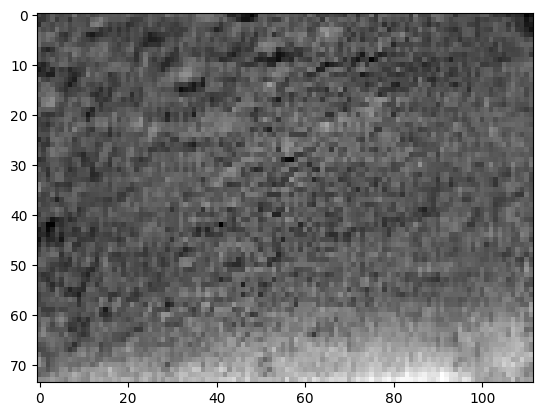

In [24]:
plt.imshow(sample_vnir_low[:,:,42], cmap='gray', aspect='auto')

### Select a specific band and position
The following example will get the sample `GCH-0013`, crop `02` and hyperspectral image `vnir_high`. Also will select the band 128 for visualization.

In [25]:
sample0013 = hidsag.get_sample('GCH-0013')
sample_vnir_high = sample0011.get_data('02', 'vnir_high')
im = sample_vnir_high[:,:,128]

Along with the visualization, we will show a position in the image. The pixel `(30,60)` will be highlighted in **red**.

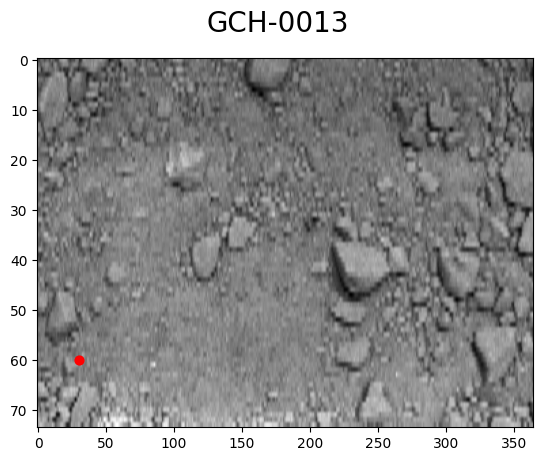

In [26]:
plt.suptitle(sample0013, fontsize=20)
plt.imshow(im, cmap='gray', aspect='auto')
plt.scatter(30, 60, color='red', s=40)

### Visualize the spectrum
The following code will select the spectrum data from the highlighted pixel `(30,60)` and will plot the selected spectrum.

After selecting the spectrum we will show the lenght of the VNIR HIGH: 942 bands

In [27]:
spectrum = sample_vnir_high[30,60,:]
len(spectrum)

942

We use the wavelenght from the current dataset, the result can be wavelenght.wavelength_VNIR or wavelenght.wavelength_SWIR 

In [28]:
wavelenght = hidsag.get_wavelength()

Text(0, 0.5, 'Reflectance')

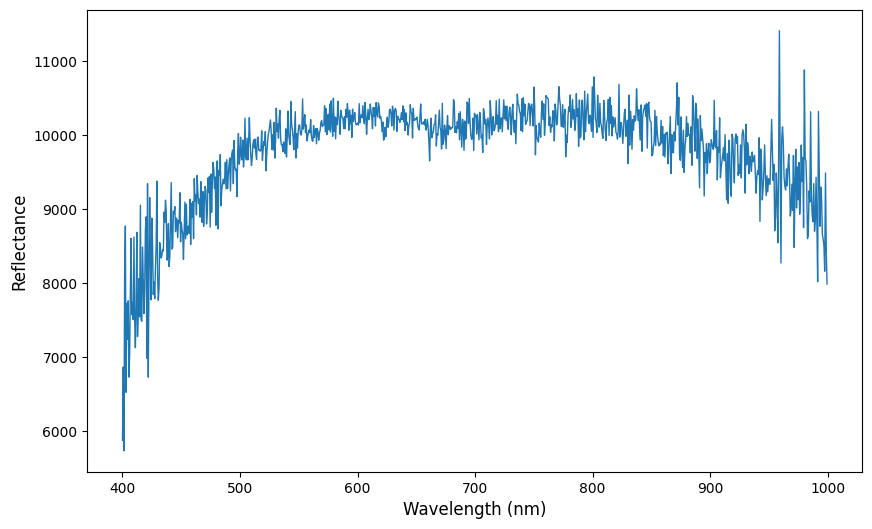

In [29]:
plt.figure(figsize = (10,6))
plt.plot(wavelenght.wavelength_VNIR, spectrum, label=f'Spectra for Sample {sample0013}', linewidth = 1)
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Reflectance',fontsize=12)